In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load list of SN with their subclasses

In [2]:
labels = pd.read_parquet('ztf_confirmed_sn.parquet')
labels

,ID,Name,RA,DEC,Obj. Type,Redshift,Host Name,Host Redshift,Reporting Group/s,Discovery Data Source/s,...,Public,End Prop. Period,Discovery Mag/Flux,Discovery Filter,Discovery Date (UT),Sender,Remarks,Discovery Bibcode,Classification Bibcodes,Ext. catalog/s
0,121024,SN 2022abto,11:43:29.832,+03:23:26.04,SN Ic,0.0252,None,NaN,"ZTF, ATLAS","ZTF, ATLAS",...,1,None,17.2400,r-ZTF,2022-11-23 11:15:21.600,ZTF_Bot1,NaN,2022TNSTR3454....1F,2022TNSCR3513....1S,NaN
1,121009,SN 2022absz,04:57:33.798,-07:38:22.12,SN Ia,0.0860,None,NaN,"ZTF, Pan-STARRS","ZTF, Pan-STARRS",...,1,None,19.9800,r-ZTF,2022-11-21 08:08:09.600,ZTF_Bot1,NaN,2022TNSTR3454....1F,2022TNSCR3510....1F,NaN
2,120822,SN 2022ablu,01:20:07.077,+42:43:00.53,SN Ia,0.0610,2MASX J01200734+4243009,NaN,"ALeRCE, ATLAS","ZTF, ATLAS",...,1,None,18.9698,g-ZTF,2022-11-24 03:16:17.996,ALeRCE,NaN,2022TNSTR3420....1M,2022TNSCR3469....1F,NaN
3,120743,SN 2022abiv,11:46:57.207,-03:38:39.96,SN Ia,0.0510,SDSS J114657.01-033840.6,NaN,"ALeRCE, ATLAS","ZTF, ATLAS",...,1,None,19.1897,r-ZTF,2022-11-21 13:27:31.997,ALeRCE,NaN,2022TNSTR3409....1M,2022TNSCR3469....1F,NaN
4,120719,SN 2022abhx,03:14:18.578,+46:01:45.12,SN Ia,0.0250,None,NaN,"ZTF, ATLAS","ZTF, ATLAS",...,1,None,19.0500,r-ZTF,2022-11-23 05:51:21.600,ZTF_Bot1,NaN,2022TNSTR3411....1F,2022TNSCR3429....1L,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,25460,SN 2018aey,10:51:16.440,+22:28:39.40,SN Ia,0.0770,None,0.0767,ZTF,ZTF,...,1,2018-04-24,18.4000,r-ZTF,2018-03-05 06:08:38.000,ZTF_Bot1,NaN,2018TNSTR.545....1L,2018TNSCR.547....1N,NaN
73,25459,SN 2018aex,11:00:45.380,+22:17:14.96,SN II,0.0230,None,0.0229,"ZTF, GaiaAlerts, ATLAS","ZTF, GaiaAlerts, ATLAS",...,1,None,18.1000,r-ZTF,2018-03-05 06:07:12.000,ZTF_Bot1,NaN,2018TNSTR.545....1L,2018TNSCR.547....1N,NaN
74,25295,SN 2018yt,08:59:35.590,+45:36:41.90,SN II,0.0520,None,NaN,ZTF,ZTF,...,1,2018-04-24,18.9000,r-ZTF,2018-02-09 06:00:00.000,ZTF_Bot1,NaN,2018TNSTR.544....1T,2018TNSCR.548....1T,NaN
75,24959,SN 2018mg,10:56:53.580,+79:16:42.50,SN Ia,0.1100,None,NaN,ZTF,ZTF,...,1,2018-02-07,20.1000,g-ZTF,2018-01-11 10:52:26.000,ZTF_Bot1,NaN,2018TNSTR.172....1L,2018TNSCR.175....1F,NaN


### Keep only the sources that were discovered after ALeRCE started its operation

In [3]:
recent_sn = pd.to_datetime(labels['Discovery Date (UT)']) > '2018-06-01'
labels = labels[recent_sn]
labels

,ID,Name,RA,DEC,Obj. Type,Redshift,Host Name,Host Redshift,Reporting Group/s,Discovery Data Source/s,...,Public,End Prop. Period,Discovery Mag/Flux,Discovery Filter,Discovery Date (UT),Sender,Remarks,Discovery Bibcode,Classification Bibcodes,Ext. catalog/s
0,121024,SN 2022abto,11:43:29.832,+03:23:26.04,SN Ic,0.0252,None,NaN,"ZTF, ATLAS","ZTF, ATLAS",...,1,None,17.2400,r-ZTF,2022-11-23 11:15:21.600,ZTF_Bot1,NaN,2022TNSTR3454....1F,2022TNSCR3513....1S,NaN
1,121009,SN 2022absz,04:57:33.798,-07:38:22.12,SN Ia,0.0860,None,NaN,"ZTF, Pan-STARRS","ZTF, Pan-STARRS",...,1,None,19.9800,r-ZTF,2022-11-21 08:08:09.600,ZTF_Bot1,NaN,2022TNSTR3454....1F,2022TNSCR3510....1F,NaN
2,120822,SN 2022ablu,01:20:07.077,+42:43:00.53,SN Ia,0.0610,2MASX J01200734+4243009,NaN,"ALeRCE, ATLAS","ZTF, ATLAS",...,1,None,18.9698,g-ZTF,2022-11-24 03:16:17.996,ALeRCE,NaN,2022TNSTR3420....1M,2022TNSCR3469....1F,NaN
3,120743,SN 2022abiv,11:46:57.207,-03:38:39.96,SN Ia,0.0510,SDSS J114657.01-033840.6,NaN,"ALeRCE, ATLAS","ZTF, ATLAS",...,1,None,19.1897,r-ZTF,2022-11-21 13:27:31.997,ALeRCE,NaN,2022TNSTR3409....1M,2022TNSCR3469....1F,NaN
4,120719,SN 2022abhx,03:14:18.578,+46:01:45.12,SN Ia,0.0250,None,NaN,"ZTF, ATLAS","ZTF, ATLAS",...,1,None,19.0500,r-ZTF,2022-11-23 05:51:21.600,ZTF_Bot1,NaN,2022TNSTR3411....1F,2022TNSCR3429....1L,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,27013,SN 2018civ,15:31:14.040,+16:53:33.72,SN IIn,0.0260,None,NaN,"ZTF, Pan-STARRS, GaiaAlerts","ZTF, Pan-STARRS, GaiaAlerts",...,1,None,19.2500,r-ZTF,2018-06-04 07:36:28.000,ZTF_Bot1,NaN,2018TNSTR.797....1F,2018TNSCR1127....1F,NaN
29,27004,SN 2018cim,15:57:39.310,+78:36:44.03,SN Ib,0.0350,None,NaN,"ZTF, GaiaAlerts","ZTF, GaiaAlerts",...,1,None,18.4100,r-ZTF,2018-06-06 09:17:16.000,ZTF_Bot1,NaN,2018TNSTR.790....1F,2018TNSCR.815....1F,NaN
30,26999,SN 2018cih,12:32:29.340,+04:53:20.22,SN IIn,0.0828,None,NaN,"ZTF, Pan-STARRS, GaiaAlerts, ATLAS","ZTF, Pan-STARRS, GaiaAlerts, ATLAS",...,1,None,18.8300,r-ZTF,2018-06-05 04:43:40.000,ZTF_Bot1,NaN,2018TNSTR.781....1F,2018TNSCR.944....1F,NaN
31,26970,SN 2018chf,10:26:06.538,+47:16:27.43,SN Ia,0.0628,None,NaN,"ZTF, ATLAS","ZTF, ATLAS",...,1,None,19.1500,g-ZTF,2018-06-03 04:37:55.000,ZTF_Bot1,NaN,2018TNSTR.781....1F,"2018TNSCR.792....1F, 2020TNSCR2287....1D",NaN


## Load light curves

In [4]:
lightcurves = pd.read_parquet('ztf_sn_lightcurves.parquet')
print(len(lightcurves['oid'].unique()))
lightcurves

5545


,tid,mjd,candid,fid,pid,diffmaglim,isdiffpos,nid,distnr,magpsf,...,has_stamp,corrected,dubious,step_id_corr,phase,oid,parent_candid,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext
0,ztf,59906.468970,2152468963115015003,2,2152468963115,19.685380,1,2152,2.357079,17.240618,...,True,False,False,1.1.6,0.0,ZTF22abwtqeb,NaN,NaN,NaN,NaN
1,ztf,59909.519016,2155519013115015012,1,2155519013115,19.976534,1,2155,2.395199,17.403370,...,True,False,False,1.1.6,0.0,ZTF22abwtqeb,NaN,NaN,NaN,NaN
2,ztf,59914.477951,2160477953115015022,1,2160477953115,20.223219,1,2160,2.405421,17.712181,...,True,False,False,1.1.6,0.0,ZTF22abwtqeb,NaN,NaN,NaN,NaN
3,ztf,59914.531632,2160531633115015010,2,2160531633115,20.186400,1,2160,2.344412,17.204460,...,True,False,False,1.1.6,0.0,ZTF22abwtqeb,NaN,NaN,NaN,NaN
0,ztf,59904.339491,2150339495815015014,2,2150339495815,20.104700,1,2150,4.419630,19.977400,...,False,False,False,1.1.6,0.0,ZTF22abwqedu,2.152357e+18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,ztf,59902.525035,2148525033115010001,2,2148525033115,19.730371,-1,2148,0.354816,19.623697,...,True,True,False,1.1.6,0.0,ZTF18aaaoaeq,NaN,19.457785,0.131113,0.169727
200,ztf,59904.500683,2150500683115010003,2,2150500683115,20.420218,-1,2150,0.230716,19.640068,...,True,True,False,1.1.6,0.0,ZTF18aaaoaeq,NaN,19.443928,100.000000,0.106298
201,ztf,59906.505683,2152505683115010004,2,2152505683115,20.270147,-1,2152,0.344343,19.685555,...,True,True,False,1.1.6,0.0,ZTF18aaaoaeq,NaN,19.407366,0.038058,0.109703
202,ztf,59909.456620,2155456623115010001,2,2155456623115,20.368883,-1,2155,0.205452,19.678019,...,True,True,False,1.1.6,0.0,ZTF18aaaoaeq,NaN,19.413235,0.039806,0.110842


### Intersection

In [5]:
oid_intersection = list(set(labels['Disc. Internal Name']).intersection(set(lightcurves['oid'])))
labels = labels[labels['Disc. Internal Name'].isin(oid_intersection)]
lightcurves = lightcurves[lightcurves['oid'].isin(oid_intersection)]

### Length distribution

[]

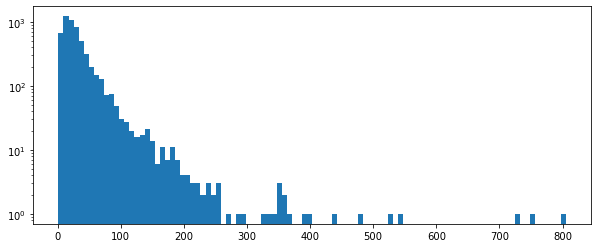

In [6]:
lc_lengths = lightcurves.groupby('oid').count()['tid'].sort_values()

plt.figure(figsize=(10, 4))
plt.hist(lc_lengths, bins=100);
plt.semilogy()

### Remove light curves that are too short (not useful) or too long (possible artifacts)

In [7]:
oids = lc_lengths[(lc_lengths > 10) & (lc_lengths < 300)].index.values
lightcurves = lightcurves[lightcurves['oid'].isin(oids)]
labels = labels[labels['Disc. Internal Name'].isin(oids)]

### New length distribution

[]

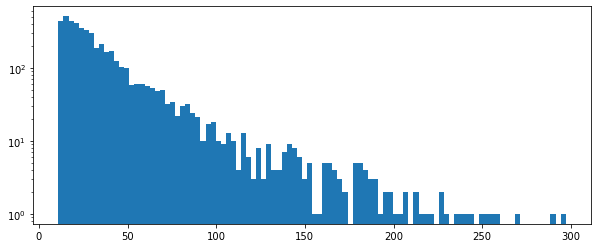

In [8]:
lc_lengths = lightcurves.groupby('oid').count()['tid'].sort_values()

plt.figure(figsize=(10, 4))
plt.hist(lc_lengths, bins=100);
plt.semilogy()

## Light curve visualization

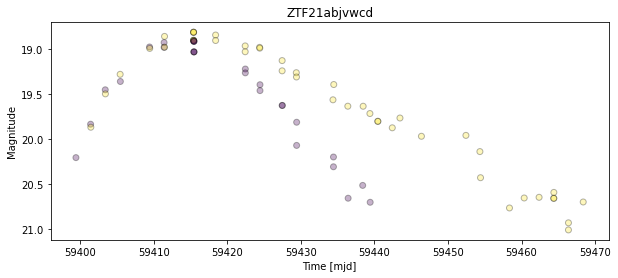

In [9]:
selected_oid = lc_lengths.index[4200]
selected_lightcurve = lightcurves[lightcurves['oid'] == selected_oid]

plt.figure(figsize=(10, 4))
plt.scatter(
    selected_lightcurve['mjd'],
    selected_lightcurve['magpsf'],
    c=selected_lightcurve['fid'],
    alpha=0.3,
    edgecolors='k'
)
plt.gca().invert_yaxis()
plt.xlabel('Time [mjd]')
plt.ylabel('Magnitude')
plt.title(selected_oid);

## Subclass distribution

In [10]:
labels.groupby('Obj. Type').count()['ID'].sort_values()

Obj. Type
SN IIL                  1
SN Icn                  2
SN IIn-pec              2
SN Ib-Ca-rich           2
SN Ib-pec               3
SN Ia-SC                3
SN II-pec               4
SN Ia-CSM               8
SN                      9
SN Iax[02cx-like]      10
SN Ibn                 11
SN I                   12
SN Ia-91bg-like        14
SN Ib/c                15
SN Ia-pec              28
SLSN-II                36
SN Ic-BL               37
SN IIb                 51
SN IIP                 53
SLSN-I                 59
SN Ib                  66
SN Ic                  73
SN Ia-91T-like        107
SN IIn                140
SN II                 603
SN Ia                3323
Name: ID, dtype: int64